In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw as W
from scipy.special import factorial
from scipy import optimize
import warnings
%matplotlib inline

The problem we are about to solve is:

> Find all roots $x$ for all value of base $a$:

$$
\begin{align}
a^x = \log_a(x) \,,\quad a,x \in (0,1)
\end{align}
$$

The problem can be rewritten as:

\begin{align}
a^x = \log_a(x) \Leftrightarrow & e ^{x\ln(a)} = \frac{\ln(x)}{\ln(a)} \\
\Leftrightarrow & x\ln(a) e ^{x\ln(a)} = x\ln(x) \\
\Leftrightarrow & x\ln(a) = W \left( x\ln(x) \right) \\
\Leftrightarrow & a_k(x) = \exp\left\{ \frac{W_k \left( x\ln(x) \right)}{x} \right\} \\
\Rightarrow & a(x) = \exp\left\{ \frac{\ln(x)}{x} \right\} \\
\end{align}

Where $W$ is the [Lambert W Function][2]. Thus we have an explicit function $a_k(x)$.

For numerical consideration it is also valuable to express the problem in the form of a function then the problem reduces to find roots:

$$
\begin{equation}
f(x)=a^x - \frac{\ln(x)}{\ln(a)}
\end{equation}
$$

And its derivatives:

$$
\begin{equation}
f^{(n)}(x)=a^x \ln^n(a)+(-1)^n \frac{(n-1)!}{x^n\, \ln(a)}
\end{equation}
$$

Roots of first derivative are:



[2]: https://en.wikipedia.org/wiki/Lambert_W_function

In [2]:
eps = np.finfo(np.float64).eps
tol = 1e7

In [3]:
a_crit = np.exp(-np.exp(1))
x_crit = np.exp(-1)

In [4]:
def f(x, a):
    return np.power(a, x) - np.log(x)/np.log(a)

In [5]:
def fn(x, a, n=0):
    return np.power(a, x)*np.power(np.log(a),n) + np.power(-1, n)*(factorial(n-1)/(np.power(x, n)*np.log(a)))

In [6]:
def base(x, k=0):
    global x_crit
    global a_crit
    r = np.exp(W(x*np.log(x), k=k)/x)
    q = np.isclose(x, x_crit)
    r[q] = a_crit + 0j
    assert np.all(~np.iscomplex(r))
    return r.real

In [7]:
n = 1001
xeps = np.linspace(0.+eps, 1-eps, n)

In [8]:
xlog = xeps*np.log(xeps)

In [9]:
a0 = base(xeps, k=0)
a1 = base(xeps, k=-1)

In [10]:
title = "Lambert W Applied"

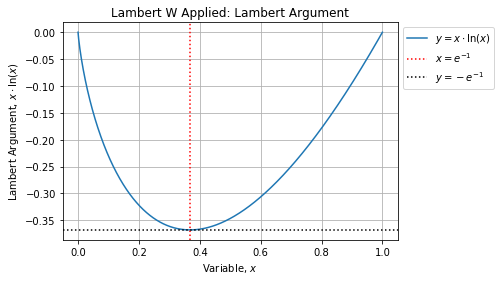

In [11]:
fig, axe = plt.subplots()
axe.plot(xeps, xlog, label=r"$y = x \cdot\ln(x)$")
axe.axvline(x_crit, linestyle=':', color='red', label=r'$x=e^{-1}$')
axe.axhline(-x_crit, linestyle=':', color='black', label=r'$y=-e^{-1}$')
axe.set_title('%s: Lambert Argument' % title)
axe.set_xlabel(r"Variable, $x$")
axe.set_ylabel(r"Lambert Argument, $x \cdot\ln(x)$")
lgd = axe.legend(bbox_to_anchor=(1,1), loc='upper left')
axe.grid()
fig.savefig('LambertWApplied_LambertArgument.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

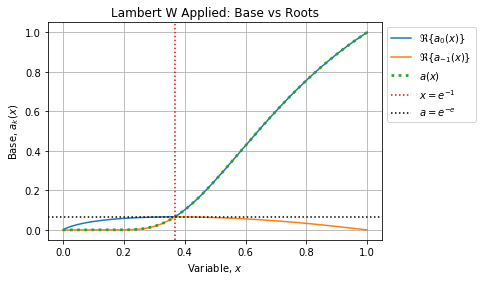

In [12]:
fig, axe = plt.subplots()
axe.plot(xeps, a0, label=r"$\Re\{a_{0}(x)\}$")
axe.plot(xeps, a1, label=r"$\Re\{a_{-1}(x)\}$")
axe.plot(xeps, np.exp(np.log(xeps)/xeps), linestyle=':', linewidth=2.7, label=r"$a(x)$")
axe.axvline(x_crit, linestyle=':', color='red', label=r'$x=e^{-1}$')
axe.axhline(a_crit, linestyle=':', color='black', label=r'$a=e^{-e}$')
axe.set_title('%s: Base vs Roots' % title)
axe.set_xlabel(r"Variable, $x$")
axe.set_ylabel(r"Base, $a_k(x)$")
lgd = axe.legend(bbox_to_anchor=(1,1), loc='upper left')
axe.grid()
fig.savefig('LambertWApplied_Base.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [13]:
def tabulate(n=1001):
    global eps
    global tol
    global a_crit
    global x_crit
    r = 0.25
    #x = np.linspace(0.+eps, 1.-eps, n)
    x = np.sort(np.append(np.linspace(0.+eps, 1.-eps, n-3), [x_crit-tol*eps, x_crit, x_crit+tol*eps]))
    a0 = base(x, 0)
    a1 = base(x, -1)
    a = np.full((n, 3), np.nan)
    q0 = a0 <= a_crit
    q1 = xeps >= x_crit
    a[q0,0] = a0[q0]
    a[~q0,1] = a0[~q0]
    a[q0,1] = a1[q0]
    a[q1,2] = a1[q1]
    return x, a

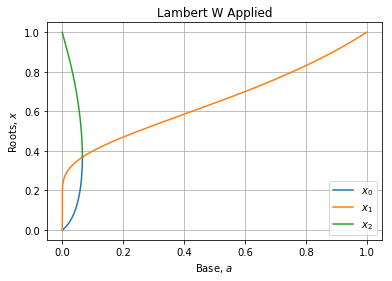

In [14]:
fig, axe = plt.subplots()
x, a = tabulate()
axe.plot(a, x)
axe.set_title(title)
axe.set_xlabel(r"Base, $a$")
axe.set_ylabel(r"Roots, $x$")
axe.legend([r"$x_0$", r"$x_1$", r"$x_2$"])
axe.grid(which='both')

In [15]:
def approx(a):
    x, ax = tabulate()
    return np.array([np.interp(a, np.sort(ax[:,i]), x[np.argsort(ax[:,i])]) for i in range(3)])

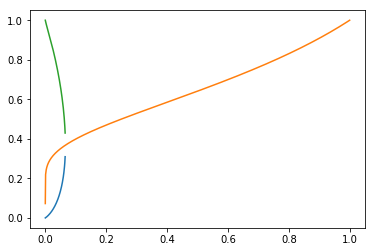

In [16]:
x
plt.plot(x, approx(x).T)